In [1]:
from Precode2 import *
import numpy

data = np.load('AllSamples.npy')

In [2]:
k1,i_point1,k2,i_point2 = initial_S2('2728') # please replace 0111 with your last four digit of your ID

Strategy 2: k and initial points


In [3]:
print(k1)
print(i_point1)
print(k2)
print(i_point2)

4
[2.37650624 8.15241778]
6
[2.38952606 7.22195564]


In [8]:
from pandas import DataFrame
import math
import random
import sys
import matplotlib.pyplot as plt

def dist(point1, point2):
    return math.sqrt(sum((point1 - point2) ** 2))

def gen_centroids(dataset, k, point):
    n = dataset.shape[1]
    center = np.zeros((k, n))
    center[0][0] = point[0]
    center[0][1] = point[1]
    p = 1
    while (p < k):
        maxdistance = -100
        for i in range(dataset.shape[0]):
            total = 0
            for j in range(0, p):
                total = total + dist(dataset[i], center[j])
            average = total / p

            if average > maxdistance:
                maxdistance = average
                index = i
        center[p, :] = dataset[index, :]
        p += 1
    return center


def kmeans(dataset, center, k):
    cluster = np.zeros((dataset.shape[0], 2))
    change = True
    while change:
        change = False
        for i in range(dataset.shape[0]):
            minDistance = sys.maxsize
            minIndex = 0
            for j in range(k):
                distance = dist(center[j], dataset[i])
                if distance < minDistance:
                    minDistance = distance
                    minIndex = j
            if cluster[i, 0] != minIndex:
                change = True
                cluster[i, :] = minIndex, minDistance
        for n in range(k):
            points = dataset[np.nonzero(cluster[:, 0] == n)[0]]
            center[n, :] = np.mean(points, axis=0)
    return center, cluster

def showCluster(dataset, k):
    numSamples, dim = dataset.shape
    mark = ['or', 'ob', 'og', 'ok', '^r', '+r', 'sr', 'dr', '<r', 'pr']
    plt.rcParams['figure.figsize'] = (16,9)
    for i in range(numSamples):
        markIndex = int(DivideCluster[i, 0])
        plt.plot(dataset[i, 0], dataset[i, 1], mark[markIndex])

    for i in range(k):
        plt.plot(centroids[i, 0], centroids[i, 1], '*', markersize = 24)

    plt.show()

def get_objection(center, cluster, k):
    sum = 0
    for i in range(k):
        count = 0
        obj = 0
        for j in cluster:
            if j[0] == i:
                obj = obj + dist(center[i], data[count]) ** 2
            count += 1
        sum = sum + obj
    return sum


for k = 4
[[3.34264769 6.92602803]
 [2.85235149 2.28186483]
 [7.17928621 8.0520791 ]
 [6.78374609 2.85019999]]
805.116645747261


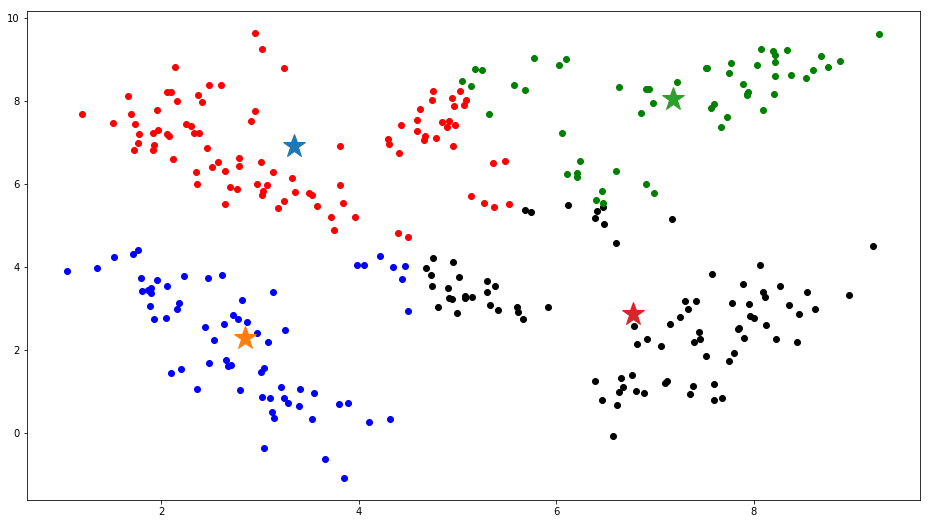


for k = 6
[[2.60123296 6.91610506]
 [3.21257461 2.49658087]
 [7.75648325 8.55668928]
 [7.25262683 2.40015826]
 [5.40252508 6.73636175]
 [       nan        nan]]
613.2824392056043


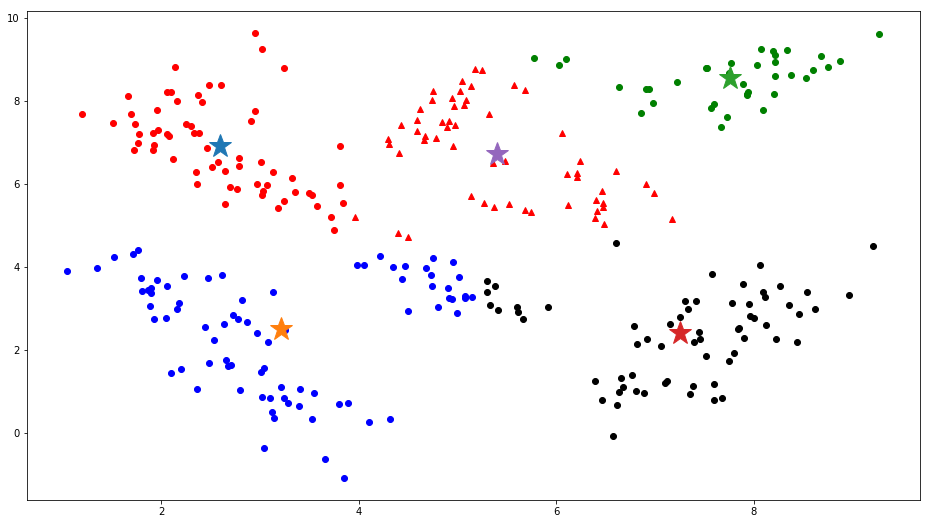

In [9]:
print('for k =', k1)

center1 = gen_centroids(data, k1, i_point1)
centroids, DivideCluster = kmeans(data, center1, k1)
print(centroids)
print(get_objection(centroids, DivideCluster, k1))
showCluster(data, k1)

print('\nfor k =', k2)
center2 = gen_centroids(data, k2, i_point2)
centroids, DivideCluster = kmeans(data, center2, k2)
print(centroids)
print(get_objection(centroids, DivideCluster, k2))
showCluster(data, k2)